In [1]:
# import packages
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import metrics 

C:\Users\kduong\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data from mat file
# mat = scipy.io.loadmat("exampleEMGdata180trial_train.mat")

# load feature data from csv
features = pd.read_csv('feature_table.csv')
# test_features = pd.read_csv('test_features.csv')
# test_features = pd.read_csv('feature_table.csv')

# make individual label tensor / column
labels = features.pop('labels')
# test_labels = test_features.pop('labels')

# test_features

In [3]:
# make rms features
rms_headers = [f"RMS ch {num}" for num in [x+1 for x in range(4)]]
rms_features = features[rms_headers]

# make wl features
wl_headers = [f"WL ch {num}" for num in [x+1 for x in range(4)]]
wl_features = features[wl_headers]

# make var features
var_headers = [f"VAR ch {num}" for num in [x+1 for x in range(4)]]
var_features = features[var_headers]

# make iemg features
iemg_headers = [f"IEMG ch {num}" for num in [x+1 for x in range(4)]]
iemg_features = features[iemg_headers]

# make mf features
mf_headers = [f"MF ch {num}" for num in [x+1 for x in range(4)]]
mf_features = features[mf_headers]

# make pf features
pf_headers = [f"PF ch {num}" for num in [x+1 for x in range(4)]]
pf_features = features[pf_headers]

# make best feature
best_feature = pd.concat([mf_features, pf_features], axis=1, join='inner')

# make mf test features
# test_mf_features = test_features[mf_headers]

# make pf test features
# test_pf_features = test_features[pf_headers]

# make best test feature
# test_best_feature = pd.concat([test_mf_features, test_pf_features], axis=1, join='inner')



In [4]:
def get_accuracy(feature, label):

#     METRICS = [
#       tf.keras.metrics.CategoricalAccuracy(name='accuracy')
# ]

    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(feature)

    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2187, activation='relu'),
        tf.keras.layers.Dense(729, activation='relu'),
        tf.keras.layers.Dense(243, activation='relu'),
        tf.keras.layers.Dense(81, activation='relu'),
        tf.keras.layers.Dense(27, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=tf.keras.metrics.CategoricalAccuracy(name='accuracy'))

    model.fit(feature, label, epochs=50)

    loss, acc = model.evaluate(feature, label)

    return acc

In [5]:
# rms_acc = get_accuracy(rms_features, labels)
# wl_acc = get_accuracy(wl_features, labels)
# var_acc = get_accuracy(var_features, labels)
# iemg_acc = get_accuracy(iemg_features, labels)
# mf_acc = get_accuracy(mf_features, labels)
# pf_acc = get_accuracy (pf_features, labels)

In [6]:
# accuracies = [rms_acc, wl_acc, var_acc, iemg_acc, mf_acc, pf_acc]

# x = 1
# for acc in accuracies:
#     plt.bar(x, acc, width=0.5)
#     x += 1

# plt.xlabel('Feature Type')
# plt.ylabel('Training Accuracy')
# plt.title('Resubstitution Accuracy of RPS Training Data Features')
# plt.legend(['Root Mean Square', 'Waveform Length', 'Variance', 'Integrated EMG', 'Mean Frequency', 'Peak Frequency'])

In [7]:
# train_best_acc, train_tp, train_fp, train_tn, train_fn, train_pre, train_re= get_accuracy(best_feature, labels)
# test_best_acc, test_tp, test_fp, test_tn, test_fn, test_pre, test_re = get_accuracy(test_best_feature, test_labels)
# train_results = get_accuracy(best_feature, labels)
# test_results = get_accuracy(test_best_feature, test_labels)

In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(best_feature)

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(729, activation='relu'),
    tf.keras.layers.Dense(243, activation='relu'),
    tf.keras.layers.Dense(81, activation='relu'),
    tf.keras.layers.Dense(27, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            # metrics=tf.keras.metrics.CategoricalAccuracy(name='accuracy')
            metrics=['accuracy']
            )

model.fit(best_feature, labels, epochs=20)

loss, acc = model.evaluate(best_feature, labels)

Epoch 1/20


C:\Users\kduong\Anaconda3\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 1s 735ms/step - loss: 1.0999 - accuracy: 0.2333
Epoch 2/20
1/1 [==============================] - 0s 6ms/step - loss: 1.0339 - accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 7ms/step - loss: 0.9851 - accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 0.9433 - accuracy: 0.7667
Epoch 5/20
1/1 [==============================] - 0s 6ms/step - loss: 0.9014 - accuracy: 0.7667
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 0.8605 - accuracy: 0.7667
Epoch 7/20
1/1 [==============================] - 0s 7ms/step - loss: 0.8198 - accuracy: 0.7333
Epoch 8/20
1/1 [==============================] - 0s 7ms/step - loss: 0.7784 - accuracy: 0.7333
Epoch 9/20
1/1 [==============================] - 0s 6ms/step - loss: 0.7362 - accuracy: 0.7667
Epoch 10/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6941 - accuracy: 0.7667
Epoch 11/20
1/1 [==============================]

C:\Users\kduong\Anaconda3\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [9]:
prediction_vector = model.predict(best_feature)

1/1 [==============================] - 0s 95ms/step


In [10]:
new_pvector = [list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) for idx in range(len(prediction_vector))]
new_pvector
labels

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
Name: labels, dtype: int64

In [11]:
# list(prediction_vector[0]).index(max(prediction_vector[0]))
# list(test_labels)

In [12]:
correct_predictions = [list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) for idx in range(len(prediction_vector)) if list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) == labels[idx]]

In [13]:
len(correct_predictions)/len(prediction_vector)

0.9666666666666667

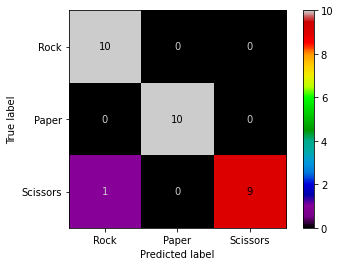

In [35]:
confusion_matrix = metrics.confusion_matrix(labels, new_pvector) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rock", "Paper", "Scissors"])
cm_display.plot(cmap = "nipy_spectral")
plt.show()